# Blogs Authorship model

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# count vectorizer is for bag of words, tfid vectorizer is for tfidf

from string import punctuation
from collections import Counter

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline



## 1. Import and analyze the data set

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/blogtext.csv")
df1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df1.shape

(681284, 7)

In [7]:
df1.duplicated().sum()

4686

In [8]:
df1.drop_duplicates(inplace =True)

In [9]:
df1.duplicated().sum()

0

In [10]:
df1.shape

(676598, 7)

In [11]:
df1.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676598 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      676598 non-null  int64 
 1   gender  676598 non-null  object
 2   age     676598 non-null  int64 
 3   topic   676598 non-null  object
 4   sign    676598 non-null  object
 5   date    676598 non-null  object
 6   text    676598 non-null  object
dtypes: int64(2), object(5)
memory usage: 41.3+ MB


(array([153119.,  80670.,  72448., 201624.,  45745.,  17532.,  62044.,
         17653.,  12816.,  12947.]),
 array([13. , 16.5, 20. , 23.5, 27. , 30.5, 34. , 37.5, 41. , 44.5, 48. ]),
 <BarContainer object of 10 artists>)

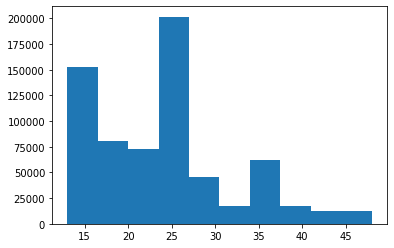

In [13]:
plt.hist(df1["age"])


<Axes: xlabel='age', ylabel='count'>

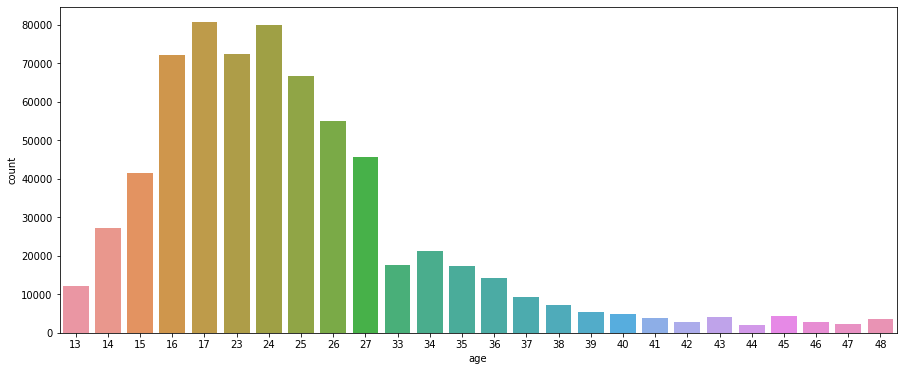

In [14]:
# Checking age column
plt.figure(figsize=(15,6))
sns.countplot(x='age',data=df1)

From above countplot we observed that data is biased for age group above 30, our model will not be able to predict accurate results for the same.

<Axes: xlabel='gender', ylabel='count'>

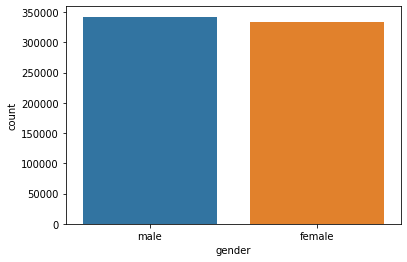

In [15]:
# Checking gendre column

sns.countplot(x='gender',data=df1)

From above plot it is clear that gender is equally distributed.

<Axes: xlabel='sign', ylabel='count'>

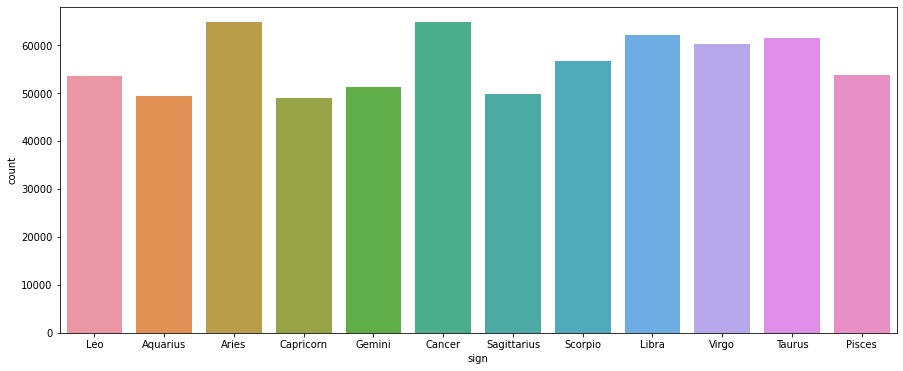

In [16]:
# Checking sign column
plt.figure(figsize=(15,6))
sns.countplot(x='sign',data=df1)


From above plot it is clear that we have similar obeservations for the given sign categories.

In [17]:
# Considering small sub-set from the dataset
df=df1.head(12000)

In [18]:
# Dropping irrelevent features - id & date
df.drop(['id','date'], axis=1, inplace=True)
df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


## 2. Data pre-processing

## 2.1 Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

In [19]:
# Removing special characters from the text column
df['clean_data'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [20]:
# remove unwanted spaces
df['clean_data']=df['clean_data'].apply(lambda x: x.strip())

In [21]:
# covert text to lowercase
df['clean_data'] = df['clean_data'].apply(lambda x: x.lower())

In [22]:
df.head()

,gender,age,topic,sign,text,clean_data
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...


In [23]:
# Removing stopwords
stop_words=set(stopwords.words('english'))

In [24]:
df['clean_data'] = df['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stop_words]))

In [25]:
df.head()

,gender,age,topic,sign,text,clean_data
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...


# 2.2 Target/label merger and transformation

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 12027
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      12000 non-null  object
 1   age         12000 non-null  int64 
 2   topic       12000 non-null  object
 3   sign        12000 non-null  object
 4   text        12000 non-null  object
 5   clean_data  12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 656.2+ KB


In [27]:
# converting "age" from int to object
df['age']=df['age'].astype('object')

In [28]:
df['labels'] = df.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [29]:
df.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [30]:
new_df = df[["clean_data", "labels"]]
new_df.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


# 2.3 Vectorization

In [31]:
X = df['clean_data']
Y = df['labels']

In [32]:
# performing countvectorizer
vectorizer= CountVectorizer(binary =True, ngram_range=(1,2))
X = vectorizer.fit_transform(X)

In [33]:
vectorizer.get_feature_names_out()[:10]

array(['aa', 'aa amazing', 'aa anger', 'aa batteries', 'aa compared',
       'aa keeps', 'aa nice', 'aa sd', 'aaa', 'aaa come'], dtype=object)

In [34]:
label_counts = dict()

for labels in df.labels.values:
  for item in labels:
    if item in label_counts:
      label_counts[item] += 1
    else:
      label_counts[item] =1

In [35]:
label_counts

{'male': 6917,
 '15': 661,
 'Student': 1388,
 'Leo': 303,
 '33': 401,
 'InvestmentBanking': 70,
 'Aquarius': 721,
 'female': 5083,
 '14': 228,
 'indUnk': 4082,
 'Aries': 4399,
 '25': 547,
 'Capricorn': 506,
 '17': 1488,
 'Gemini': 327,
 '23': 663,
 'Non-Profit': 88,
 'Cancer': 1029,
 'Banking': 61,
 '37': 37,
 'Sagittarius': 1232,
 '26': 371,
 '24': 908,
 'Scorpio': 1125,
 '27': 1251,
 'Education': 308,
 '45': 16,
 'Engineering': 321,
 'Libra': 491,
 'Science': 67,
 '34': 555,
 '41': 46,
 'Communications-Media': 99,
 'BusinessServices': 132,
 'Sports-Recreation': 80,
 'Virgo': 446,
 'Taurus': 941,
 'Arts': 185,
 'Pisces': 480,
 '44': 3,
 '16': 533,
 'Internet': 208,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 102,
 '35': 2327,
 'Technology': 2766,
 '36': 1722,
 'Law': 11,
 '46': 7,
 'Consulting': 21,
 'Automotive': 14,
 '42': 14,
 'Religion': 9,
 '13': 59,
 'Fashion': 1622,
 '38': 46,
 '43': 6,
 'Publishing': 67,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 46,
 'Hum

## Implementing MultilableBinarizer

In [36]:
binarizer = MultiLabelBinarizer(classes = sorted(label_counts.keys()))
Y = binarizer.fit_transform(df.labels)

## 2.4 Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=2,test_size= 0.2)

In [38]:
print(X_train.shape)
print(Y_train.shape)

(9600, 780848)
(9600, 70)


In [39]:
print(X_test.shape)
print(Y_test.shape)

(2400, 780848)
(2400, 70)


# 3. Design, train, tune and test the best text classifier

In [40]:
model_logreg = LogisticRegression(solver= "lbfgs")
model = OneVsRestClassifier(model_logreg)

In [41]:
model.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [42]:
Y_pred = model.predict(X_test)

In [43]:
# #  Printing inverse data from the predicted labels

Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

## 4. Print the true vs predicted labels for any 5 entries from the dataset.

In [45]:
Y_pred_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('male',),
 ('female',)]

In [46]:
Y_test_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('27', 'Taurus', 'female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('15', 'Pisces', 'Student', 'female')]

## Evaluation matrix

In [47]:
def print_evaluation_matrix(Y_test, Y_pred):
    print("Accuracy_score :", accuracy_score(Y_test, Y_pred))
    print("F1_score :", f1_score(Y_test, Y_pred, average = 'micro'))
    print("precision_score :",precision_score(Y_test, Y_pred, average ="micro"))
    print("recall_score :", recall_score(Y_test, Y_pred,average = 'micro'))
    

print_evaluation_matrix(Y_test, Y_pred)

Accuracy_score : 0.2654166666666667
F1_score : 0.5992680695333943
precision_score : 0.8041038232199228
recall_score : 0.47760416666666666


## 5. Display and explain detail the classification report 

In [48]:
  print("classification report :\n", classification_report(Y_test, Y_pred))

classification report :
               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       1.00      0.03      0.05        40
           2       0.96      0.19      0.32       141
           3       0.90      0.26      0.40       108
           4       0.76      0.23      0.35       295
           5       0.89      0.06      0.11       138
           6       0.92      0.27      0.41       172
           7       1.00      0.04      0.08       102
           8       1.00      0.03      0.06        60
           9       0.86      0.27      0.42       256
          10       1.00      0.07      0.13        74
          11       0.99      0.72      0.83       115
          12       0.80      0.55      0.65       487
          13       0.96      0.52      0.68       340
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        21
  

## Tune

In [49]:
model_logreg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver = 'lbfgs')))])
model_logreg_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression()))])

-  This strategy consists in fitting one classifier per class. 
For each classifier, the class is fitted against all the other classes.

In [50]:
Y_pred = model_logreg_pipeline.predict(X_test)

In [51]:
# #  Printing inverse data from the predicted labels

Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

In [52]:
def print_evaluation_matrix(Y_test, Y_pred):
    print("Accuracy_score :", accuracy_score(Y_test, Y_pred))
    print("F1_score :", f1_score(Y_test, Y_pred, average = 'micro'))
    print("precision_score :",precision_score(Y_test, Y_pred, average ="micro"))
    print("recall_score :", recall_score(Y_test, Y_pred,average = 'micro'))
    

print_evaluation_matrix(Y_test, Y_pred)

Accuracy_score : 0.2654166666666667
F1_score : 0.5992680695333943
precision_score : 0.8041038232199228
recall_score : 0.47760416666666666


In [53]:
  print("classification report :\n", classification_report(Y_test, Y_pred))

classification report :
               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       1.00      0.03      0.05        40
           2       0.96      0.19      0.32       141
           3       0.90      0.26      0.40       108
           4       0.76      0.23      0.35       295
           5       0.89      0.06      0.11       138
           6       0.92      0.27      0.41       172
           7       1.00      0.04      0.08       102
           8       1.00      0.03      0.06        60
           9       0.86      0.27      0.42       256
          10       1.00      0.07      0.13        74
          11       0.99      0.72      0.83       115
          12       0.80      0.55      0.65       487
          13       0.96      0.52      0.68       340
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        21
  

In [54]:
Y_pred_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('male',),
 ('female',)]

In [55]:
Y_test_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('27', 'Taurus', 'female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('15', 'Pisces', 'Student', 'female')]

## Navie bayes

In [56]:
NB_model = MultinomialNB(alpha=1.0)
model2_nb = OneVsRestClassifier(NB_model)
model2_nb.fit(X_train, Y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [57]:
Y_pred = model2_nb.predict(X_test)

In [58]:
Y_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [59]:
# Printing inverse data from the predicted labels

Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

In [60]:
Y_pred_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('male',),
 ('female',)]

In [61]:
Y_test_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('27', 'Taurus', 'female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('15', 'Pisces', 'Student', 'female')]

In [62]:
def print_evaluation_matrix_NB(Y_test, Y_pred):
    print("Accuracy_score :", accuracy_score(Y_test, Y_pred))
    print("F1_score :", f1_score(Y_test, Y_pred, average = 'micro'))
    print("precision_score :",precision_score(Y_test, Y_pred, average ="micro"))
    print("recall_score :", recall_score(Y_test, Y_pred,average = 'micro'))
    

print_evaluation_matrix_NB(Y_test, Y_pred)

Accuracy_score : 0.09166666666666666
F1_score : 0.47525978941573194
precision_score : 0.7002636382072602
recall_score : 0.3596875


## SVM

In [63]:
SVM_model = LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model3_svc = OneVsRestClassifier(SVM_model)
model3_svc.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

In [64]:
Y_pred = model3_svc.predict(X_test)

In [65]:
Y_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [66]:
# Printing inverse data from the predicted labels

Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

In [67]:
Y_pred_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('17', 'female', 'indUnk'),
 ('female',)]

In [68]:
Y_test_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('27', 'Taurus', 'female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('15', 'Pisces', 'Student', 'female')]

In [69]:
def print_evaluation_matrix_svc(Y_test, Y_pred):
    print("Accuracy_score :", accuracy_score(Y_test, Y_pred))
    print("F1_score :", f1_score(Y_test, Y_pred, average = 'micro'))
    print("precision_score :",precision_score(Y_test, Y_pred, average ="micro"))
    print("recall_score :", recall_score(Y_test, Y_pred,average = 'micro'))
    

print_evaluation_matrix_svc(Y_test, Y_pred)

Accuracy_score : 0.265
F1_score : 0.6263503992484735
precision_score : 0.7177072120559742
recall_score : 0.555625


## Hyperparameter Tuning with SVC

In [129]:
hyperparameter = { 
                  'n_jobs':[1,-1], 'verbose': [1,2,3]}
grid = GridSearchCV(model3_svc, hyperparameter)

In [130]:
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.5min finished
[Parallel(n_jo

{'n_jobs': -1, 'verbose': 2}
OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'), n_jobs=-1,
                    verbose=2)


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.4min finished


In [132]:
model4_svc_hyp = OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'), n_jobs=-1,
                    verbose=2)
model4_svc_hyp .fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.8min finished


OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'), n_jobs=-1,
                    verbose=2)

In [133]:
Y_pred = model4_svc_hyp.predict(X_test)

In [135]:
# Printing inverse data from the predicted labels

Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

In [146]:
Y_pred_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('female', 'indUnk'),
 ('female',)]

In [147]:
Y_test_inversed[:5]

[('36', 'Aries', 'Fashion', 'male'),
 ('27', 'Taurus', 'female', 'indUnk'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('15', 'Pisces', 'Student', 'female')]

In [138]:
def print_evaluation_matrix_svc_hyp(Y_test, Y_pred):
    print("Accuracy_score :", accuracy_score(Y_test, Y_pred))
    print("F1_score :", f1_score(Y_test, Y_pred, average = 'micro'))
    print("precision_score :",precision_score(Y_test, Y_pred, average ="micro"))
    print("recall_score :", recall_score(Y_test, Y_pred,average = 'micro'))
    

print_evaluation_matrix_svc_hyp(Y_test, Y_pred)

Accuracy_score : 0.2683333333333333
F1_score : 0.6260920551158018
precision_score : 0.7161636485580147
recall_score : 0.5561458333333333


In [139]:
print("classification report :\n", classification_report(Y_test, Y_pred))

classification report :
               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.75      0.15      0.25        40
           2       0.70      0.40      0.51       141
           3       0.62      0.41      0.49       108
           4       0.57      0.39      0.46       295
           5       0.62      0.23      0.34       138
           6       0.75      0.40      0.52       172
           7       0.61      0.23      0.33       102
           8       0.36      0.13      0.20        60
           9       0.71      0.44      0.54       256
          10       0.57      0.22      0.31        74
          11       0.98      0.80      0.88       115
          12       0.70      0.60      0.64       487
          13       0.79      0.60      0.68       340
          14       1.00      0.14      0.25         7
          15       0.75      0.23      0.35        13
          16       0.43      0.14      0.21        21
  

In [150]:
binarizer.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', 'Accounting', 'Advertising', 'Aquarius',
       'Architecture', 'Aries', 'Arts', 'Automotive', 'Banking',
       'BusinessServices', 'Cancer', 'Capricorn', 'Communications-Media',
       'Consulting', 'Education', 'Engineering', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Marketing',
       'Military', 'Museums-Libraries', 'Non-Profit', 'Pisces',
       'Publishing', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Transportation', 'Virgo', 'female',
       'indUnk', 'male'], dtype=object)

In [149]:
binarizer.classes_.size

70

In this model has 70 classes are there, Classification report gives Precision,Recall ,f1-score and support for each of these classes separately.

*   classes 13,36,46,banking, capricon,leo, libra etc. having 100% precision while some classes like 39 to 45, accounting and taurus etc. having 0% precision.

*   Mostly classes have a high precision greater than 50%. It means that from the total predictions our model has made, approx 50% are correct.

*   Recall for most classes is low. Few classe have both precision and recall 0%, hence there f1 score is also 0. For that classes support are single digit number and it is very low.

*  Our data was highly imbalanced. Hence the model was biased in predicting the majority classes correctly.

*  The minority classes could not be correclty predicted by our model. Such classes have both Recall and precion as 0.

*  The classes having higher support value(number of actual occurances of the class) have a good precision and recall as well.

*   In this case f1-score is consider because f1-score is the harmonic mean of recall and precion.










